In [106]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,vgg19_neural,m01_d2,conv2_2,NaN,0.021,0.129,1.396,1.423,0.114,NaN
1,vgg19_neural,m01_d2,conv2_2,10.0,0.018,0.110,1.396,1.423,0.184,-0.099
2,vgg19_neural,m01_d2,conv2_2,20.0,0.019,0.111,1.396,1.423,0.180,-0.094
3,vgg19_neural,m01_d2,conv2_2,50.0,0.021,0.129,1.396,1.423,0.177,-0.087
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091
...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m02_d3,fc,200.0,0.021,0.168,1.704,1.712,0.157,0.107
96,simclr_neural,m02_d3,fc,300.0,0.021,0.169,1.704,1.712,0.157,0.105
97,simclr_neural,m02_d3,fc,400.0,0.021,0.169,1.704,1.712,0.158,0.110
98,simclr_neural,m02_d3,fc,500.0,0.021,0.169,1.704,1.712,0.158,0.084


In [107]:
# Alpha is the same for a given layer and mouse regardless of n_pcs - just filter on 100 here to get one alpha value per layer per mouse
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,vgg19_neural,m01_d2,conv2_2,100.0,0.021,0.129,1.396,1.423,0.177,-0.091
9,vgg19_neural,m01_d2,conv3_4,100.0,0.018,0.109,1.515,1.462,0.199,-0.056
14,vgg19_neural,m01_d2,conv4_4,100.0,0.019,0.128,1.616,1.645,0.160,0.000
19,vgg19_neural,m01_d2,conv5_4,100.0,0.012,0.099,1.867,1.698,0.122,0.252
24,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.702,1.711,0.214,0.108
33,vgg19_neural,m01_d2,fc2,100.0,0.010,0.095,1.583,1.589,0.093,0.447
38,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,3.891,4.271,0.225,-0.114
47,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,3.487,3.872,0.233,-0.080
56,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,1.911,1.917,0.245,-0.005
65,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.887,1.894,0.193,0.085


In [108]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,simclr_neural,fc,100.0,0.019000,0.121000,1.703000,1.712333,0.174333,0.108
1,simclr_neural,layer1,100.0,0.020333,0.109333,3.820000,4.203000,0.195000,-0.114
2,simclr_neural,layer2,100.0,0.039000,0.178333,3.463333,3.928667,0.209333,-0.080
3,simclr_neural,layer3,100.0,0.041000,0.168333,1.891333,1.896333,0.213333,-0.005
4,simclr_neural,layer4,100.0,0.026000,0.128000,1.882333,1.889333,0.165333,0.085
5,vgg19_neural,conv2_2,100.0,0.016667,0.109333,1.395667,1.421333,0.137000,-0.091
6,vgg19_neural,conv3_4,100.0,0.015000,0.099000,1.517667,1.513000,0.146333,-0.056
7,vgg19_neural,conv4_4,100.0,0.015000,0.121000,1.624000,1.653667,0.118333,0.000
8,vgg19_neural,conv5_4,100.0,0.009667,0.093333,1.791333,1.708667,0.091667,0.252
9,vgg19_neural,fc2,100.0,0.008000,0.091333,1.588000,1.590333,0.070667,0.447


In [109]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")
avg_metrics

# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['alpha'].sem().reset_index()
sem_df.columns = ['layer', 'sem_alpha']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')

In [110]:
# Load neural alpha for each mouse
paths = [
    Path("../../../analysis/mouse_m01_d2/03_simclr_neural/neural_dimensionality.json"),
    Path("../../../analysis/mouse_m02_d3/03_simclr_neural/neural_dimensionality.json"),
    Path("../../../analysis/mouse_m03_d4/03_simclr_neural/neural_dimensionality.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.append(data)

neural_alpha_df = pd.DataFrame(all_data)
neural_alpha_df = neural_alpha_df.sort_values(["mouse_id"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(neural_alpha_df)} rows from {len(paths)} files.")
neural_alpha_df.head(100)

Loaded 3 rows from 3 files.


,alpha,alpha_no_pc1,mouse_id
0,2.458674,2.510033,m01_d2
1,2.637521,2.680891,m02_d3
2,2.618053,2.670324,m03_d4


In [111]:
# Compute neural_alpha mean and SEM
neural_alpha_mean = neural_alpha_df['alpha'].mean()
neural_alpha_sem = neural_alpha_df['alpha'].sem()

<Figure size 600x500 with 0 Axes>

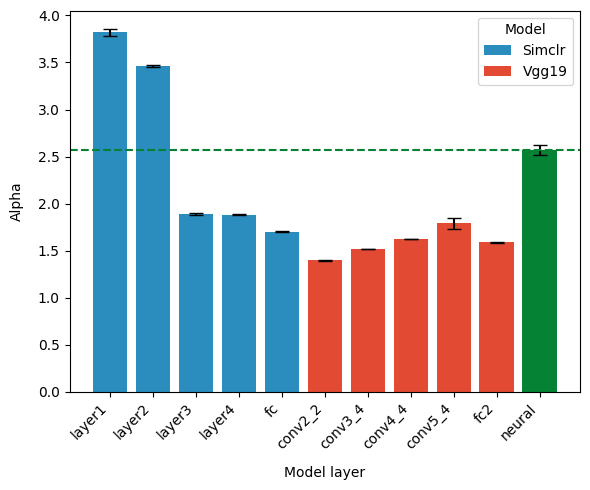

In [112]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours, neural_colour

# Clean labels and sort
ordered_labels = [
    'layer1', 'layer2', 'layer3', 'layer4', 'fc',
    'conv2_2', 'conv3_4', 'conv4_4', 'conv5_4', 'fc2'
]
avg_metrics["layer"] = pd.Categorical(
        avg_metrics["layer"], categories=ordered_labels, ordered=True)

avg_metrics = avg_metrics.sort_values('layer')

# Colour mapping by model
model_colour = {
    'simclr': simclr_colours['layer4'],
    'vgg19': vgg19_colours['conv5_4'],
}

avg_metrics["colour"] = avg_metrics["model_target"].str.lower().map(
    lambda s: next((v for k, v in model_colour.items() if k in s), None)
)

# Plot
plt.figure(figsize=(6, 5))

# Extend data for plotting
x_labels = list(avg_metrics['layer'].astype(str)) + ['neural']
heights = list(avg_metrics['alpha']) + [neural_alpha_mean]
colors = list(avg_metrics['colour']) + [neural_colour]
errors = list(avg_metrics['sem_alpha']) + [neural_alpha_sem] 

# Plot
plt.figure(figsize=(6, 5))
plt.bar(
    x=x_labels,
    height=heights,
    yerr=errors,
    capsize=5,
    color=colors
)

plt.axhline(
    y=neural_alpha_mean,               # your computed neural alpha mean
    linestyle='--',
    color=neural_colour,
    linewidth=1.5,
    label='Subject-averaged neural α'
)
x_center = (len(x_labels) - 1) / 2  # middle of x-axis range
# plt.text(
#     x=x_center,
#     y=neural_alpha_mean + 0.05,  # slight offset above the line
#     s='Subject-averaged neural α',
#     color='green',
#     ha='center',
#     va='bottom'
# )

# Axis and legend
plt.ylabel('Alpha', labelpad=10)
plt.xlabel('Model layer', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.legend(
    handles=[
        Patch(facecolor=color, label=model.capitalize())
        for model, color in model_colour.items()
    ],
    # ] + [Patch(facecolor=neural_colour, label='Neural')],
    title="Model"
)
plt.tight_layout()
plt.savefig("./figures/alpha.svg", format='svg')
plt.show()